<a href="https://colab.research.google.com/github/Jflorez05/Aprendizaje_Automatico/blob/main/Network_Architectures_Autoencoders_20242.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


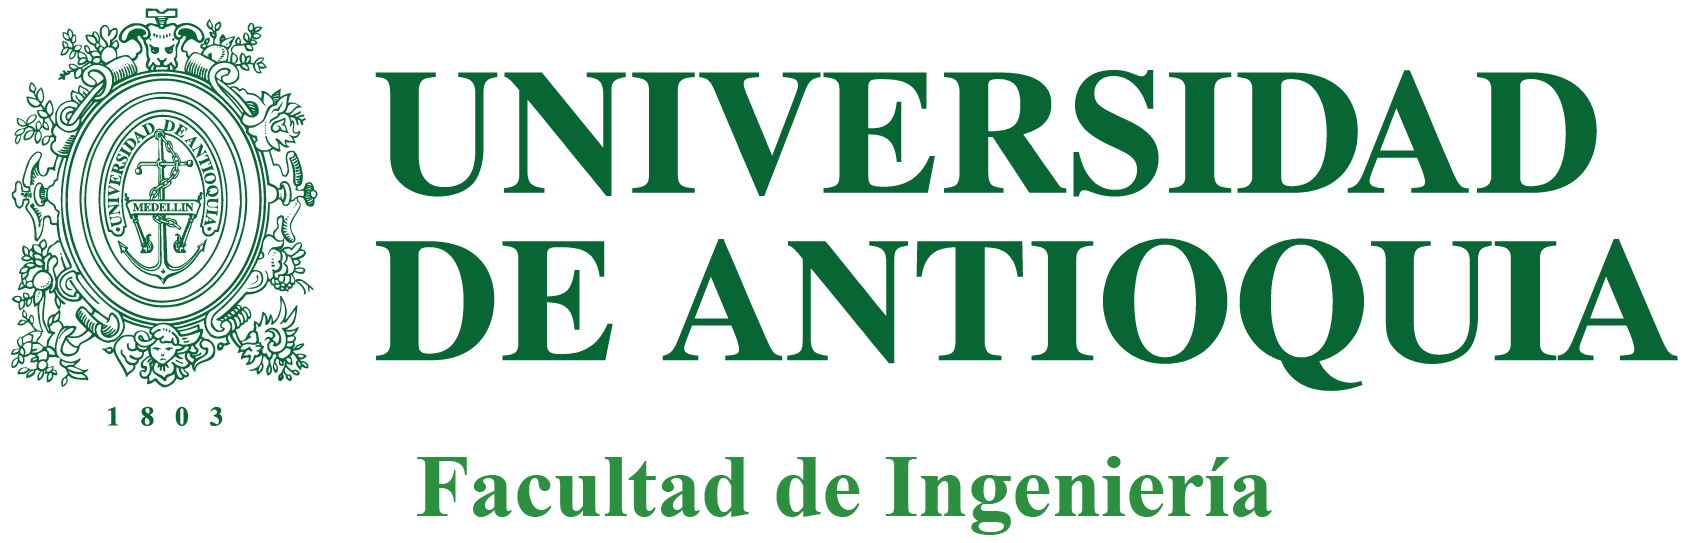
---
- **Asignatura:** Deep Learning
- **Profesor:** Hernán Felipe García Arias
- **Especialización en Analítica y Ciencia de Datos**
- **UdeA**
- **2024-2**

---

# Autoencoders

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

replicating local resources


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 1. Introduction

An autoencoder is an unsupervised learning method in which we seek to obtain a **LATENT REPRESENTATION** of our data, usually with reduced dimensionality.



We will be using

- **Tensorflow**. Since TF can use GPUs or TPUs if available, it is usually better to force all data types to be `np.float32` or `int`.

- The **MNIST** digits classification dataset. Observe how **we normalize** the MNIST images.


<img src = "https://mallahyari.github.io/ml_tutorial/images/autoen_architecture.png" width = 700px>

In [ ]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=(mnist[:,1:785]/255.).astype(np.float32)
y=(mnist[:,0]).astype(int)
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


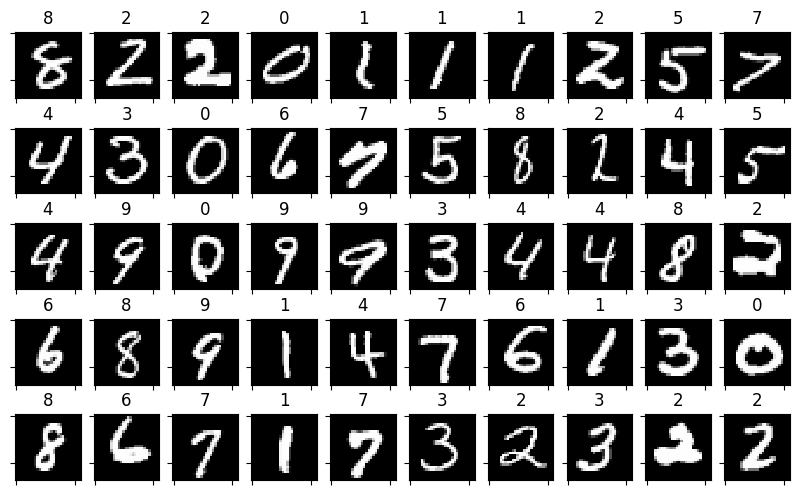

In [ ]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

and we do the regular train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 2. Assembling and training an autoencoder

Observe how an autoencoder is just a concatenation of two regular `Dense` layers. **Why are we using a sigmoid as decoder output activation?**

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import tensorflow as tf

In [ ]:
def get_model(input_dim, code_size):

    inputs = Input(shape=(input_dim,), name="input")
    encoder = Dense(code_size, activation='relu', dtype=np.float32, name="encoder")(inputs)
    outputs = Dense(input_dim, activation='sigmoid', dtype=np.float32, name="decoder")(encoder)

    model = Model([inputs], [outputs])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
model = get_model(input_dim=X.shape[1], code_size=50)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Dense)                      │ (None, 784)                 │          39,984 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,234 (309.51 KB)

 Trainable params: 79,234 (309.51 KB)

 Non-trainable params: 0 (0.00 B)

and we simply train the autoencoder. Observe how we use the same data as input and output

In [ ]:
model.fit(X_train, X_train, epochs=100, batch_size=16)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1553
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0627
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0499
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0379
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200
Epoch 15/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191
Epoc

The training seems to have gone well (the loss was reduced)

**Question**: How can we measure how **_good_** was the result?

You can try with larger layers, with more layers, etc.

### Making predictions

We can feed the model any input and get the output. Observe we **get eager tensors**, which are like a symbolic wrapper to numpy matrices. We will see more about this later in this course.

In [ ]:
o = model(X_train)
o

<tf.Tensor: shape=(1200, 784), dtype=float32, numpy=
array([[4.97254815e-09, 1.16693695e-08, 1.43374841e-08, ...,
        2.45262175e-08, 1.09233271e-08, 6.76404213e-08],
       [2.09581437e-08, 6.01040995e-08, 1.29909878e-08, ...,
        1.16355714e-07, 5.69039003e-08, 2.22922253e-07],
       [1.98603392e-08, 6.20199136e-09, 1.26379973e-08, ...,
        1.77194597e-08, 1.60731233e-08, 6.87914934e-08],
       ...,
       [9.09270548e-10, 5.19659975e-11, 6.15125520e-11, ...,
        1.28795349e-10, 5.72279890e-10, 2.41894615e-10],
       [6.16397067e-09, 1.36506795e-09, 2.73388845e-09, ...,
        8.58992211e-10, 4.12146806e-09, 1.49195767e-08],
       [6.08455437e-08, 4.09949337e-08, 5.60111912e-09, ...,
        5.80361963e-08, 3.55369252e-07, 7.10970971e-09]], dtype=float32)>

in eager tensors we can access the underlying `numpy` matrix.

In [ ]:
o.numpy()

array([[4.97254815e-09, 1.16693695e-08, 1.43374841e-08, ...,
        2.45262175e-08, 1.09233271e-08, 6.76404213e-08],
       [2.09581437e-08, 6.01040995e-08, 1.29909878e-08, ...,
        1.16355714e-07, 5.69039003e-08, 2.22922253e-07],
       [1.98603392e-08, 6.20199136e-09, 1.26379973e-08, ...,
        1.77194597e-08, 1.60731233e-08, 6.87914934e-08],
       ...,
       [9.09270548e-10, 5.19659975e-11, 6.15125520e-11, ...,
        1.28795349e-10, 5.72279890e-10, 2.41894615e-10],
       [6.16397067e-09, 1.36506795e-09, 2.73388845e-09, ...,
        8.58992211e-10, 4.12146806e-09, 1.49195767e-08],
       [6.08455437e-08, 4.09949337e-08, 5.60111912e-09, ...,
        5.80361963e-08, 3.55369252e-07, 7.10970971e-09]], dtype=float32)

which is equivalent to using the `predict` method

In [ ]:
model.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[4.97253883e-09, 1.16693695e-08, 1.43374566e-08, ...,
        2.45262175e-08, 1.09233271e-08, 6.76403005e-08],
       [2.09581437e-08, 6.01040995e-08, 1.29909630e-08, ...,
        1.16355594e-07, 5.69040104e-08, 2.22922253e-07],
       [1.98603392e-08, 6.20198026e-09, 1.26379973e-08, ...,
        1.77194597e-08, 1.60731535e-08, 6.87914934e-08],
       ...,
       [9.09272269e-10, 5.19660981e-11, 6.15125520e-11, ...,
        1.28795100e-10, 5.72278724e-10, 2.41894615e-10],
       [6.16398221e-09, 1.36506795e-09, 2.73388312e-09, ...,
        8.58992211e-10, 4.12147561e-09, 1.49196051e-08],
       [6.08455437e-08, 4.09949337e-08, 5.60111912e-09, ...,
        5.80361963e-08, 3.55369252e-07, 7.10972303e-09]], dtype=float32)

In [ ]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


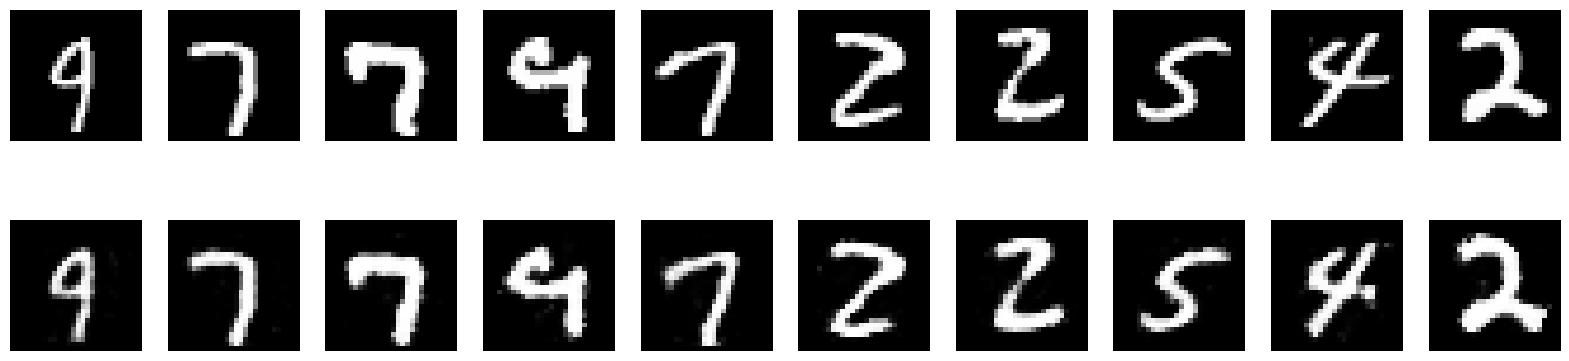

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### Accessing model layers

We can also get the output of any layer, including the final layer

In [ ]:
layer_input   = model.get_layer("input")
layer_encoder = model.get_layer("encoder")
layer_decoder = model.get_layer("decoder")

m = Model(model.inputs, [layer_decoder.output])
m(X_train)

<tf.Tensor: shape=(1200, 784), dtype=float32, numpy=
array([[4.97254815e-09, 1.16693695e-08, 1.43374841e-08, ...,
        2.45262175e-08, 1.09233271e-08, 6.76404213e-08],
       [2.09581437e-08, 6.01040995e-08, 1.29909878e-08, ...,
        1.16355714e-07, 5.69039003e-08, 2.22922253e-07],
       [1.98603392e-08, 6.20199136e-09, 1.26379973e-08, ...,
        1.77194597e-08, 1.60731233e-08, 6.87914934e-08],
       ...,
       [9.09270548e-10, 5.19659975e-11, 6.15125520e-11, ...,
        1.28795349e-10, 5.72279890e-10, 2.41894615e-10],
       [6.16397067e-09, 1.36506795e-09, 2.73388845e-09, ...,
        8.58992211e-10, 4.12146806e-09, 1.49195767e-08],
       [6.08455437e-08, 4.09949337e-08, 5.60111912e-09, ...,
        5.80361963e-08, 3.55369252e-07, 7.10970971e-09]], dtype=float32)>

of the encoder, shapes must match

In [ ]:
me = Model(model.inputs, [layer_encoder.output])
me(X_train)

<tf.Tensor: shape=(1200, 50), dtype=float32, numpy=
array([[ 0.52595353,  6.648936  ,  1.3724123 , ...,  8.313246  ,
         0.26973557,  4.943434  ],
       [ 6.0534263 ,  4.5018706 ,  5.2452574 , ...,  8.061276  ,
         9.04452   ,  0.7989024 ],
       [ 6.2203727 ,  5.4739213 ,  4.0446634 , ..., 10.428991  ,
         9.931947  ,  2.0917299 ],
       ...,
       [ 6.5273733 ,  8.644717  ,  0.26762104, ...,  6.6769123 ,
         7.835434  ,  7.832741  ],
       [ 3.0800118 ,  9.440833  ,  5.550787  , ...,  5.221261  ,
        14.135009  , 11.175353  ],
       [ 5.9008455 ,  7.7748494 ,  6.5450807 , ...,  4.0949087 ,
        10.319825  ,  3.9360876 ]], dtype=float32)>

### Accessing model weights

recall that these are the weights adjusted during training

In [ ]:
w = model.get_weights()
for i, wi in enumerate(w):
    print (f"weights {i}: {str(wi.shape):10s} sum {np.sum(wi):+6.2f}")

weights 0: (784, 50)  sum +1107.41
weights 1: (50,)      sum +20.98
weights 2: (50, 784)  sum -1415.30
weights 3: (784,)     sum -181.34


the same weights can also we accessed via the layers

In [ ]:
for i, li in enumerate(model.layers):
    print ("layer", i, ", ".join([(str(wi.shape)+" sum %+6.2f"%(np.sum(wi.numpy()))) for wi in li.weights]))


layer 0 
layer 1 (784, 50) sum +1107.41, (50,) sum +20.98
layer 2 (50, 784) sum -1415.30, (784,) sum -181.34


In this case, we can also get a visual representation of the weights in the same image space as MNIST.

Can you tell if the autoencoder "_learnt_" something?

**TRY**: inspect the weights, **BEFORE** and **AFTER** training.

In [ ]:
def show_img_grid(w):
    plt.figure(figsize=(6,6))
    for k,wi in enumerate(w):
        plt.subplot(10,10,k+1)
        plt.imshow(wi.reshape(28,28), cmap=plt.cm.Greys_r)
        plt.axis("off")

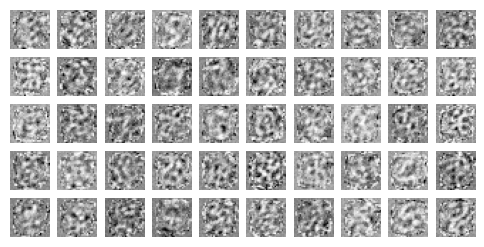

In [ ]:
show_img_grid(model.get_layer("encoder").weights[0].numpy().T)

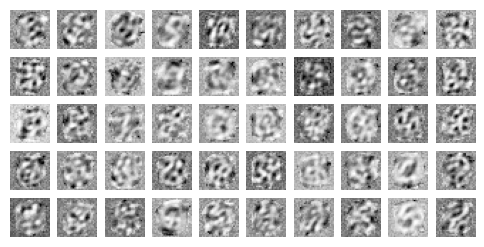

In [ ]:
show_img_grid(model.get_layer("decoder").weights[0].numpy())

### Custom feeding data and extracting intermediate activations

TF offers different ways to feed in and out of specific layers. The `tensorflow.keras.backend` offers somewhat more flexiblity.

Observe how we can feed data to our autoencoder and get the activations on the **encoder**.

In [ ]:
layer_input   = model.get_layer("input")
layer_encoder = model.get_layer("encoder")

me = Model(model.inputs, [layer_encoder.output])
me(X_train)

<tf.Tensor: shape=(1200, 50), dtype=float32, numpy=
array([[ 0.52595353,  6.648936  ,  1.3724123 , ...,  8.313246  ,
         0.26973557,  4.943434  ],
       [ 6.0534263 ,  4.5018706 ,  5.2452574 , ...,  8.061276  ,
         9.04452   ,  0.7989024 ],
       [ 6.2203727 ,  5.4739213 ,  4.0446634 , ..., 10.428991  ,
         9.931947  ,  2.0917299 ],
       ...,
       [ 6.5273733 ,  8.644717  ,  0.26762104, ...,  6.6769123 ,
         7.835434  ,  7.832741  ],
       [ 3.0800118 ,  9.440833  ,  5.550787  , ...,  5.221261  ,
        14.135009  , 11.175353  ],
       [ 5.9008455 ,  7.7748494 ,  6.5450807 , ...,  4.0949087 ,
        10.319825  ,  3.9360876 ]], dtype=float32)>

In [ ]:
import tensorflow as tf

ke = tf.function(lambda x: layer_encoder(x))
ke(X_train)

<tf.Tensor: shape=(1200, 50), dtype=float32, numpy=
array([[ 0.52595353,  6.648936  ,  1.3724123 , ...,  8.313246  ,
         0.26973557,  4.943434  ],
       [ 6.0534263 ,  4.5018706 ,  5.2452574 , ...,  8.061276  ,
         9.04452   ,  0.7989024 ],
       [ 6.2203727 ,  5.4739213 ,  4.0446634 , ..., 10.428991  ,
         9.931947  ,  2.0917299 ],
       ...,
       [ 6.5273733 ,  8.644717  ,  0.26762104, ...,  6.6769123 ,
         7.835434  ,  7.832741  ],
       [ 3.0800118 ,  9.440833  ,  5.550787  , ...,  5.221261  ,
        14.135009  , 11.175353  ],
       [ 5.9008455 ,  7.7748494 ,  6.5450807 , ...,  4.0949087 ,
        10.319825  ,  3.9360876 ]], dtype=float32)>

## 2. inspecting data in latent space (the encoder)

for one randomly chosen image

In [ ]:
img = np.random.permutation(X_test)[:1]
e = me(img).numpy()
e

array([[ 9.482707  ,  7.0318766 ,  2.950145  , 15.077692  ,  9.628287  ,
        12.99243   , 10.113672  ,  8.276825  ,  7.3885975 ,  4.404214  ,
         7.6192036 ,  7.4829726 ,  0.9839655 , 23.438957  ,  0.        ,
         0.        ,  3.0742874 , 14.356086  ,  6.508391  , 13.014957  ,
        10.874987  , 10.661772  ,  0.34425724,  5.1953845 ,  9.576414  ,
         2.0040045 , 21.20811   , 11.846903  , 14.282124  ,  7.512499  ,
         6.442253  , 12.291147  ,  8.542093  , 10.280008  ,  9.10596   ,
         6.367245  ,  6.629598  , 11.144305  , 10.732065  ,  8.096704  ,
        12.074917  , 10.41147   ,  8.339839  , 16.201906  , 13.581252  ,
        11.063411  , 10.258383  , 13.547102  , 12.799368  , 11.318717  ]],
      dtype=float32)

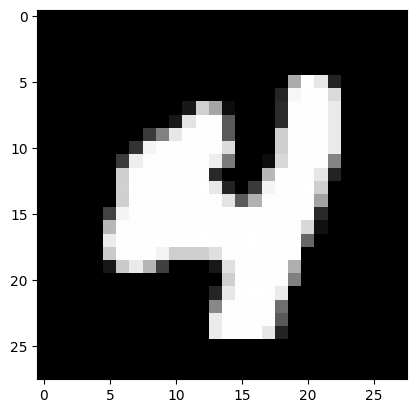

In [ ]:
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys_r);

Text(0, 0.5, 'activation (ReLU)')

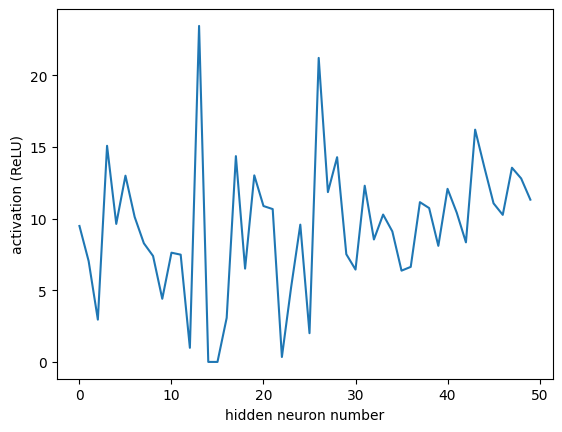

In [ ]:
plt.plot(e[0])
plt.xlabel("hidden neuron number")
plt.ylabel("activation (ReLU)")

### encoder activations

or more comprehensively for a set of images. Observe we sort the images grouping all images of each class together.

- Can you see some activation patterns for different classes?
- Is there a most active neuron per class

encoded data size (200, 50)
mean activation at encoder 5.903


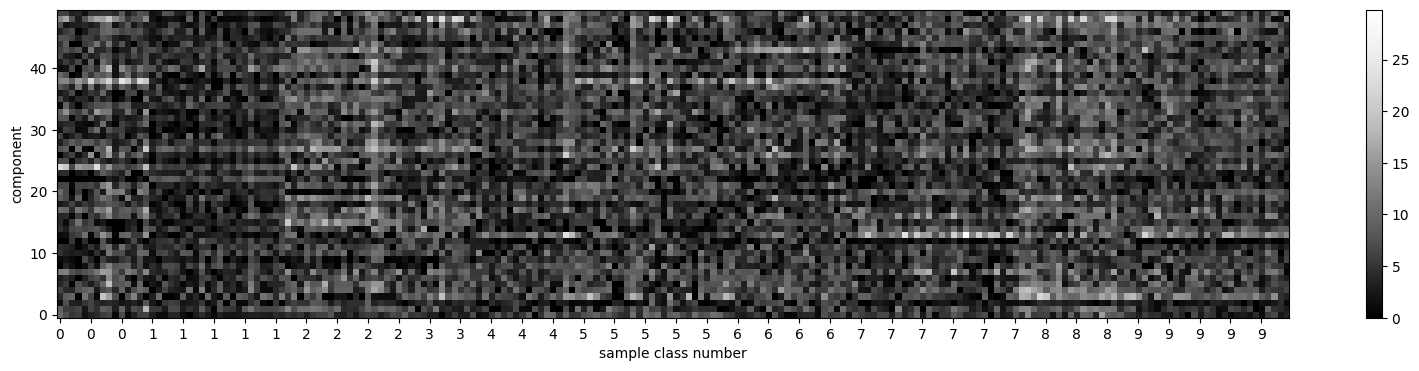

In [ ]:
idxs = np.random.permutation(len(X_test))[:200]
idxs = idxs[np.argsort(y_test[idxs])]
y_sample = y_test[idxs]
X_sample = X_test[idxs]

X_sample_encoded = me([X_sample]).numpy()
print("encoded data size", X_sample_encoded.shape)
plt.figure(figsize=(20,4))
#plt.imshow(X_sample_encoded.T, cmap=plt.cm.Greys_r, origin="bottom")
plt.imshow(X_sample_encoded.T, cmap=plt.cm.Greys_r, origin="lower")
plt.colorbar()
plt.ylabel("component")
plt.xlabel("sample class number")
plt.xticks(range(len(y_sample))[::5], y_sample[::5]);
print ("mean activation at encoder %.3f"%np.mean(X_sample_encoded))


let's get the average activation of the neurons in the latent space for each class.

**Remember however that we trained the network WITHOUT the class information (unsupervised)**

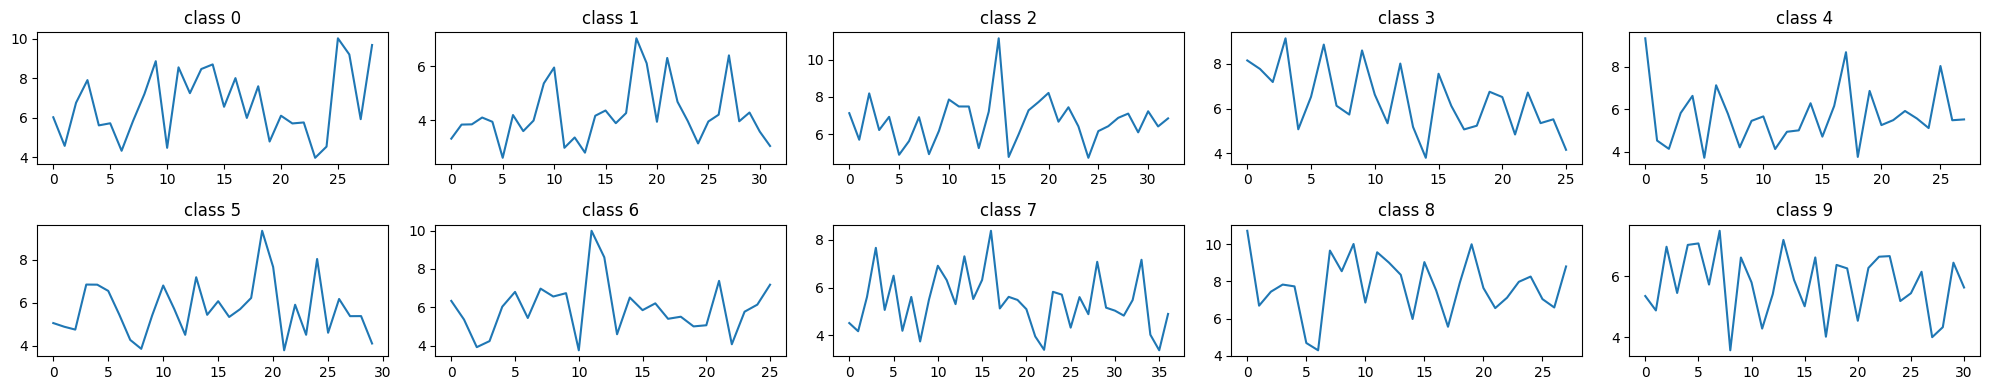

In [ ]:
e = me(X_test).numpy()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(e[y_test==i].mean(axis=1))
    plt.title(f"class {i}")
plt.tight_layout()

### observe distribution of activations at the encoder

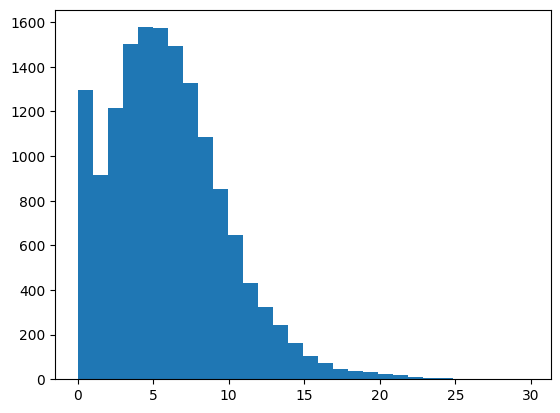

In [ ]:
plt.hist(e.flatten(), bins=30);

**From this we can inspect the neuron activations in our dataset.**

for instance, we can get the average activation of the encoder neurons across all inputs

In [ ]:
me(X_train).numpy().mean(axis=0)

array([4.950163 , 6.241742 , 3.4673076, 7.4295726, 6.9335394, 6.599926 ,
       5.771809 , 7.5753036, 5.4014683, 4.541199 , 5.9509525, 5.329013 ,
       3.126806 , 7.845503 , 5.9955406, 5.530408 , 7.1549625, 6.613681 ,
       4.1808357, 6.6018972, 4.905657 , 5.8510146, 3.637753 , 4.6180058,
       7.56973  , 4.2926903, 7.140843 , 8.551021 , 6.5628796, 4.95186  ,
       5.2557774, 5.486757 , 5.4429965, 6.6918793, 5.8397746, 5.8646965,
       5.4972463, 6.4388   , 8.635646 , 4.351995 , 8.057972 , 6.2157655,
       5.2204876, 7.7984605, 5.6348386, 4.9847445, 5.7365894, 6.5679803,
       8.031901 , 6.153751 ], dtype=float32)

## 3. Custom loss, unsupervised `.fit(X)` call $\rightarrow$ MSE

given:

- $\mathbf{x}^{(i)} \in \mathbb{R}^{784}$
- $e(\mathbf{x}^{(i)}) \in \mathbb{R}^{50}$, the encoder
- $d(e(\mathbf{x}^{(i)})) \in \mathbb{R}^{784}$, the decoder

we define the loss function as (MSE):

$$\text{loss}(\mathbf{x}^{(i)}) = \frac{1}{m}\sum_m \big(\mathbf{x}^{(i)} - d(e(\mathbf{x}^{(i)}))\big)^2$$

and implement it by hand, instead of using the prebuilt implementation

In [ ]:
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
import tensorflow as tf

# Custom layer that calculates the MSE loss
class CustomMSELossLayer(Layer):
    def __init__(self, **kwargs):
        super(CustomMSELossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        original, decoded = inputs
        mse_loss = tf.reduce_mean(tf.square(original - decoded))
        self.add_loss(mse_loss)  # Adds the loss to the model
        return decoded  # Returns the decoded output without modification

def get_model_U(input_dim, code_size):
    # Define the autoencoder layers
    inputs = Input(shape=(input_dim,), name="input")
    encoder = Dense(code_size, activation='relu', name="encoder")(inputs)
    outputs = Dense(input_dim, activation='sigmoid', name="output")(encoder)

    # Add the custom loss layer
    decoded = CustomMSELossLayer(name="mse_loss")([inputs, outputs])

    # Create the autoencoder model
    model = Model(inputs, decoded)

    # Compile the model
    model.compile(optimizer='adam')
    return model


In [ ]:
# Parámetros del modelo
input_dim = 784  # Ejemplo: tamaño de imagen 28x28 aplanada
code_size = 50   # Dimensión de la capa latente

# Crear el modelo
model = get_model_U(input_dim, code_size)

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 784)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder (Dense)           │ (None, 50)             │         39,250 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 784)            │         39,984 │ encoder[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mse_loss                  │ (None, 784)            │              0 │ input[0][0],           │
│ (CustomMSELossLayer)      │                        │                │ output[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 79,234 (309.51 KB)

 Trainable params: 79,234 (309.51 KB)

 Non-trainable params: 0 (0.00 B)

observe `.fit` call is now unsupervised (hence, the warning above)

In [ ]:
model.fit(X_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1856
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0704
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0648
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0553
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0486
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0448
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0417
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0388
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0373
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0327
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0311
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0285
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


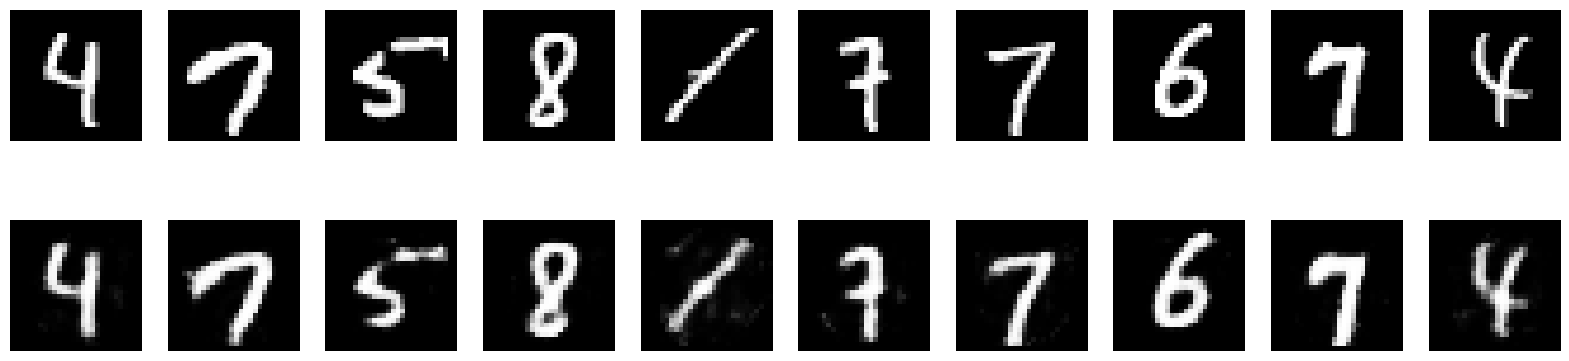

In [ ]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

## 4. Autoencoder for image denoising

observe reconstruction when fed with noisy data


In [ ]:
def add_noise(x, noise_level=.2):
    return x + np.random.normal(size=x.shape)*noise_level

In [ ]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = model.predict(X_sample_noisy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


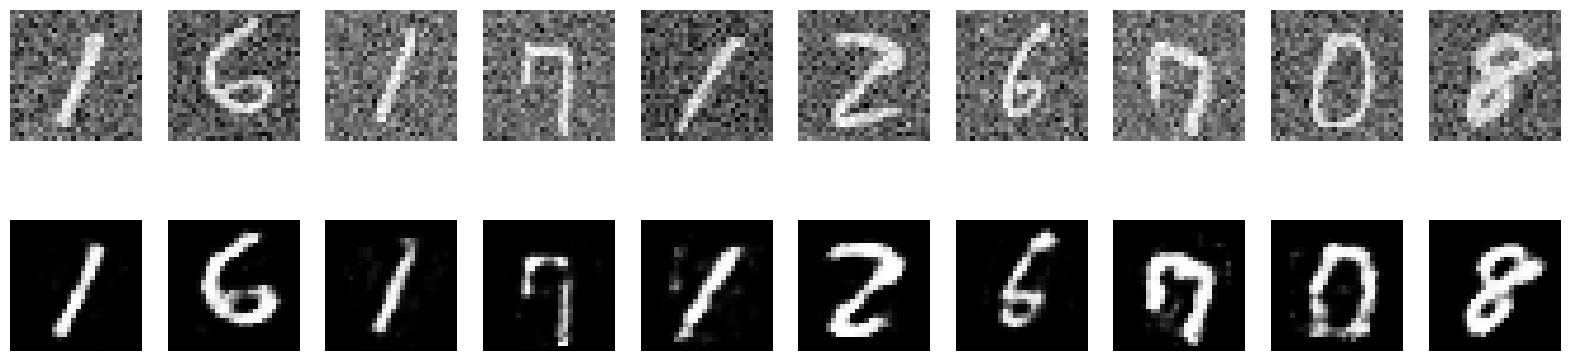

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### in a more real scenario we only have noisy data to train the model


In [ ]:
n_model = get_model(input_dim=X.shape[1], code_size=40)
X_train_noisy = add_noise(X_train)

n_model.fit(X_train_noisy, X_train_noisy, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2299
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1115
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1074
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1001
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0935
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0891
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0844
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0814
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0790
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0762
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0751
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0728
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0712
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0701
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0686
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


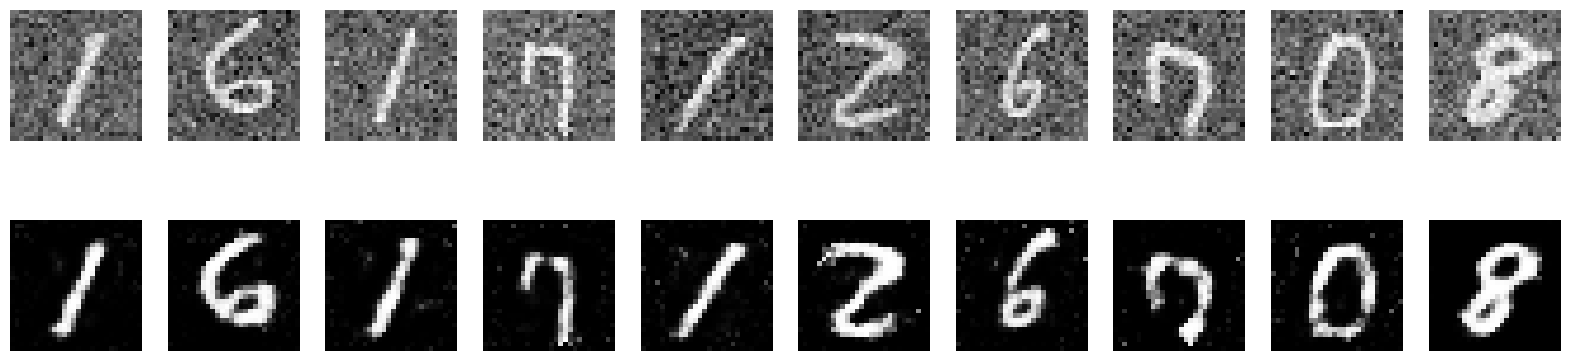

In [ ]:
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = n_model.predict(X_sample_noisy)

plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

## Paper to read

https://paperswithcode.com/method/u-net